라이브러리

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
plt.rcParams['font.family'] = 'AppleGothic'

작품 선택하기

In [142]:
#Drama
Drama = ['Game of Thrones', 'Greys Anatomy', 'Modern Family', 'Sherlock', 'The Big Bang Theory', 'The Good Place']
Movie = ['Men In Black', 'Moneyball', 'The Intern', 'Zootopia']

## 여기서 작품 선택합니다 꼭!!

In [143]:
title = Movie[3] # 여기서 작품 선택

if title in Drama:
    path='./Script/Drama'
    file_name = title.replace(' ', '_') + '_S1'
else:
    path='./Script/Movie'
    file_name = title.replace(' ', '_')

파일 불러오기

In [144]:
movie_data = pd.read_csv(f'{path}/{title}/{file_name}.csv', header=None)

In [145]:
movie = movie_data

데이터 정보

In [146]:
movie.info()
movie.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4305 non-null   object
dtypes: object(1)
memory usage: 47.6+ KB


,0
0,ZOOTOPIA
1,NaN
2,NaN
3,NaN
4,NaN
5,Original Screenplay by
6,"Jared Bush, Phil Johnston"
7,NaN
8,NaN
9,Story by


널 데이터 삭제

In [147]:
movie = movie.dropna()
movie.info()
movie.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305 entries, 0 to 6074
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4305 non-null   object
dtypes: object(1)
memory usage: 67.3+ KB


,0
0,ZOOTOPIA
5,Original Screenplay by
6,"Jared Bush, Phil Johnston"
9,Story by
10,"Byron Howard, Rich Moore,"
11,"Jared Bush, Jim Reardon, Josie Trinidad,"
12,Phil Johnston and Jennifer Lee
14,NO REPRODUCTION OF ANY PORTION OF THIS SCRIPT ...
15,WITHOUT THE EXPRESS WRITTEN CONSENT OF WALT DI...
16,IN BLACK --


DataFrame -> list

In [148]:
list_movie = list(np.array(movie[0].tolist()))
# list(np.array(df[0].tolist()))
len(list_movie)
list_movie[:10]
text_movie = ' '.join(list_movie)
#text_movie

괄호 제거

In [149]:
import re

text_movie = re.sub(r'\([^)]*\)', '', text_movie)   # 소괄호 처리
text_movie = re.sub(r'\[[^)]*\]', '', text_movie)   # 중괄호 처리
text_movie = re.sub(r'\{[^)]*\}', '', text_movie)   # 대괄호 처리
#text_movie

영문자 이외 문자는 공백으로 변환

In [150]:
import re
 
# 영문자 이외 문자는 공백으로 변환
only_english_movie = re.sub('[^a-zA-Z]', ' ', text_movie)
#only_english_movie

소문자로 변환

In [151]:
	# 소문자 변환
no_capitals_movie = only_english_movie.lower().split()
len(no_capitals_movie)

19484

# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [152]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [153]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanbyul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_movie = [word for word in no_capitals_movie if not word in stops]
len(no_stops_movie)

11054

In [155]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [156]:
no_stops_movie

['zootopia',
 'original',
 'screenplay',
 'jared',
 'bush',
 'phil',
 'johnston',
 'story',
 'byron',
 'howard',
 'rich',
 'moore',
 'jared',
 'bush',
 'jim',
 'reardon',
 'josie',
 'trinidad',
 'phil',
 'johnston',
 'jennifer',
 'lee',
 'reproduction',
 'portion',
 'script',
 'made',
 'without',
 'express',
 'written',
 'consent',
 'walt',
 'disney',
 'studios',
 'motion',
 'pictures',
 'black',
 'hear',
 'feral',
 'primeval',
 'sounds',
 'jungle',
 'night',
 'timpani',
 'bangs',
 'ominous',
 'beat',
 'fade',
 'jungle',
 'night',
 'bunny',
 'nervously',
 'walks',
 'dark',
 'foreboding',
 'forest',
 'frightened',
 'every',
 'shadow',
 'moving',
 'leaf',
 'young',
 'judy',
 'fear',
 'treachery',
 'bloodlust',
 'thousands',
 'years',
 'ago',
 'forces',
 'ruled',
 'world',
 'world',
 'prey',
 'scared',
 'predators',
 'predators',
 'uncontrollable',
 'biological',
 'urge',
 'maim',
 'maul',
 'timpani',
 'crescendos',
 'jaguar',
 'leaps',
 'shadows',
 'attacks',
 'bunny',
 'screams',
 'cut'

어간 추출

In [157]:
# # 어간 추출
# stemmer = nltk.stem.SnowballStemmer('english')
# stemmer_words = [stemmer.stem(word) for word in no_stops]

list -> DataFrame

In [158]:
df_movie = pd.DataFrame(no_stops_movie)
result_movie = pd.DataFrame(df_movie.value_counts())
result_movie = result_movie.rename_axis('words').rename(columns={0: 'counts'})
result_movie

,counts
words,
hopps,702
nick,374
judy,103
bogo,96
bellwether,84
...,...
horn,1
hoped,1
hook,1


파일로 저장

In [159]:
result_movie.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

저장한 파일 확인

In [160]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data

,words,counts
0,hopps,702
1,nick,374
2,judy,103
3,bogo,96
4,bellwether,84
...,...,...
2919,horn,1
2920,hoped,1
2921,hook,1
2922,hood,1


정제된 대본 데이터 불러오기

In [161]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   2924 non-null   object
 1   counts  2924 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


,words,counts
0,hopps,702
1,nick,374
2,judy,103
3,bogo,96
4,bellwether,84
...,...,...
2919,horn,1
2920,hoped,1
2921,hook,1
2922,hood,1


기준 단어 데이터 불러오기

In [162]:
words = pd.read_csv('./Words/word - AllLevels.csv')
words

,word,level
0,1.0,TRUE
1,1.0,zero
2,1.0,young
3,1.0,you
4,1.0,yet
...,...,...
24836,NaN,vaunted
24837,NaN,vehemence
24838,NaN,victimizer
24839,NaN,washout


단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [163]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'words'})
words

,level,words
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [164]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   2924 non-null   object 
 1   counts  2924 non-null   int64  
 2   level   1693 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.4+ KB


,words,counts,level
0,hopps,702,0
1,nick,374,999
2,judy,103,999
3,bogo,96,0
4,bellwether,84,999
...,...,...,...
2919,horn,1,4
2920,hoped,1,0
2921,hook,1,2
2922,hood,1,4


result 데이터 프레임 생성

In [165]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
0,1231
1,593
999,513
2,282
3,130
4,95
5,80


In [166]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,1231,42.099863
1,1,593,20.280438
2,2,282,9.644323
3,3,130,4.445964
4,4,95,3.248974
5,5,80,2.735978
6,999,513,17.544460


<AxesSubplot:xlabel='level'>

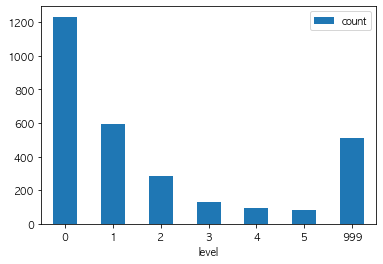

In [167]:

result.plot(x='level', y='count', kind='bar', rot=0)

단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [168]:
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [169]:
matched_data

,words,counts,level,matched
0,hopps,702,0,False
1,nick,374,999,True
2,judy,103,999,True
3,bogo,96,0,False
4,bellwether,84,999,True
...,...,...,...,...
2919,horn,1,4,True
2920,hoped,1,0,False
2921,hook,1,2,True
2922,hood,1,4,True


In [170]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   2924 non-null   object 
 1   counts  2924 non-null   int64  
 2   level   1693 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.4+ KB


,words,counts,level
7,little,59,1
9,know,57,1
10,right,52,1
11,back,51,1
12,big,49,1
...,...,...,...
2916,hover,1,5
2917,horrible,1,1
2919,horn,1,4
2921,hook,1,2


In [171]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,593
2,282
3,130
4,95
5,80


In [172]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,1,593,50.254237
1,2,282,23.898305
2,3,130,11.016949
3,4,95,8.050847
4,5,80,6.779661


<AxesSubplot:xlabel='level'>

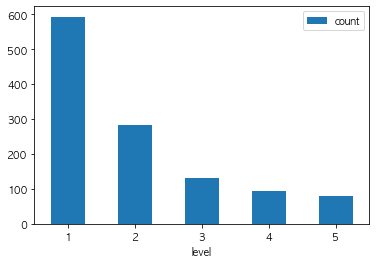

In [173]:

result.plot(x='level', y='count', kind='bar', rot=0)